In [1]:
# import libraries
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

#plotting
plt.rcParams.update({'font.size': 16})

**Exercise 6.2**

In [2]:
# cost function
def C(w1, w2):
    return 1 - 1/(1 + 2*(w1 - 3)**2 + (w2 - 2)**2)

# gradient
def gradC(w1, w2):
    return np.array([(1 + 2*(w1 - 3)**2 + (w2 - 2)**2)**-2*(4*(w1 - 3)), 
                     (1 + 2*(w1 - 3)**2 + (w2 - 2)**2)**-2*(2*(w2 - 2))])

In [3]:
def gradient_descent_simple(f, df, init, alpha, updates, track_guesses=False, find_max=False):
    # two-parameter gradient descent algorithm with fixed update rule
    current = init
    guesses = init
    
    for i in range(updates):
        if find_max == True:
            current += alpha*df(current[0], current[1])
            
        else:
            current -= alpha*df(current[0], current[1])
        
        if track_guesses == True:
            guesses = np.vstack(( guesses, current ))
        
    if track_guesses == True:
        return guesses
    
    else:
        return current

In [4]:
result = gradient_descent_simple(C, gradC, np.array([2, 0.5]), 0.3, 50, track_guesses=True)
w1s = result[:,0]
w2s = result[:,1]

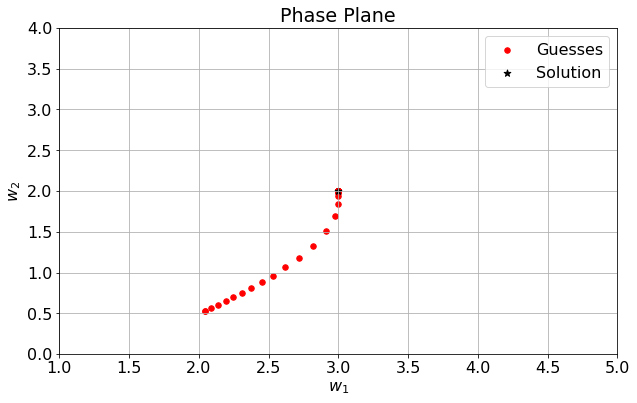

In [5]:
fig = plt.figure(figsize=(10,6))

plt.scatter(w1s, w2s, color='r', s=30, label='Guesses')
plt.scatter(3, 2, color='k', marker='*', s=50, label='Solution')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Phase Plane')
plt.xlim([1,5])
plt.ylim([0,4])
plt.legend(loc=0)
plt.grid()

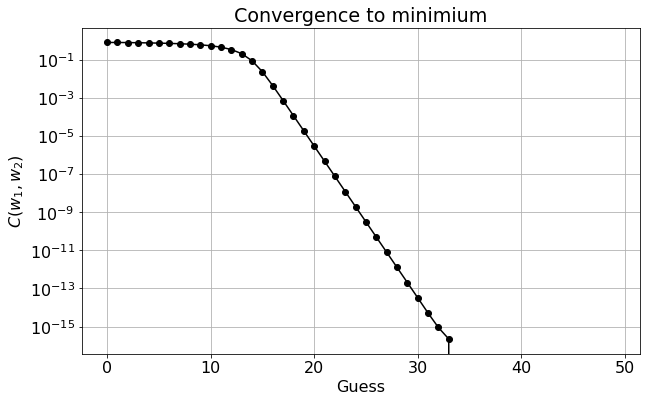

In [6]:
fig = plt.figure(figsize=(10,6))

r = np.arange(0,50)
plt.plot(r, C(w1s[r], w2s[r]), '-ko')
plt.xlabel('Guess')
plt.ylabel('$C(w_1, w_2)$')
plt.title('Convergence to minimium')
plt.yscale('log')
plt.grid()

**Exercise 6.3**

In [7]:
# generate data
N = 11
ts = np.linspace(0,1,N)
xs = 2*ts + 1 + np.random.normal(0, 0.2)

In [8]:
def f(k0, k1):
    return (1/(2*N))*np.sum((k0 + k1*ts - xs)**2)

def gradf(k0, k1):
    return np.array([(1/N)*np.sum(k0 + k1*ts - xs), (1/N)*np.sum(ts*(k0 + k1*ts - xs))])

In [9]:
result = gradient_descent_simple(f, gradf, np.array([0.1, 0.2]), 0.1, 200, track_guesses=True)
LOBF = result[-1,:]
LOBF

array([0.88028628, 1.77004792])

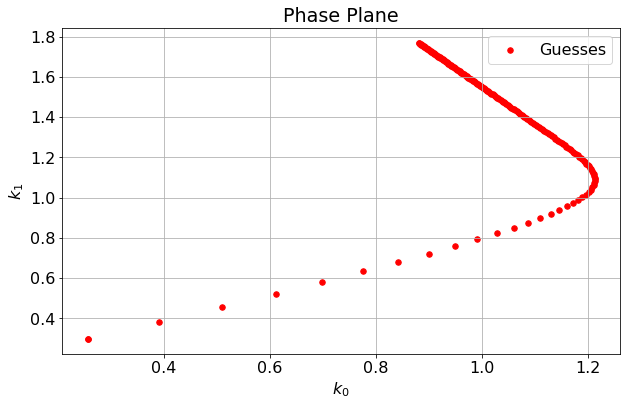

In [10]:
# phase plane
fig = plt.figure(figsize=(10,6))

plt.scatter(result[:,0], result[:,1], color='r', s=30, label='Guesses')
#plt.scatter(3, 2, color='k', marker='*', s=50, label='Solution')
plt.xlabel('$k_0$')
plt.ylabel('$k_1$')
plt.title('Phase Plane')
#plt.xlim([1,5])
#plt.ylim([0,4])
plt.legend(loc=0)
plt.grid()

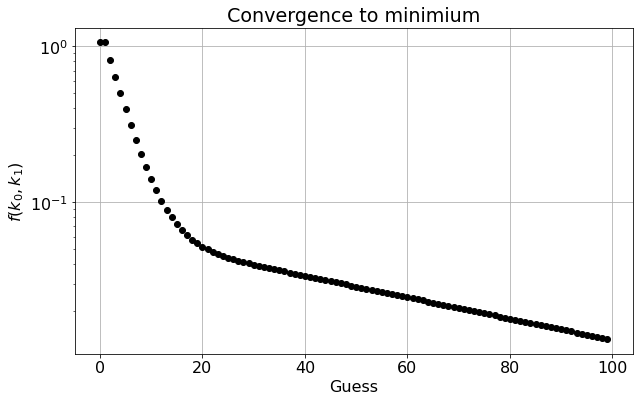

In [11]:
# value of cost function at each step
fig = plt.figure(figsize=(10,6))

for i in range(100):
    plt.plot(i, f(result[i,0], result[i,1]), '-ko')
plt.xlabel('Guess')
plt.ylabel('$f(k_0, k_1)$')
plt.title('Convergence to minimium')
plt.yscale('log')
plt.grid()

In [12]:
# true coefficients
k0 = (xs.mean()*(ts**2).mean() - ts.mean()*(xs*ts).mean())/((ts**2).mean() - (ts.mean())**2)
k1 = ((xs*ts).mean() - xs.mean()*ts.mean())/((ts**2).mean() - (ts.mean())**2)
print(k0)
print(k1)

0.7554944965144467
2.0


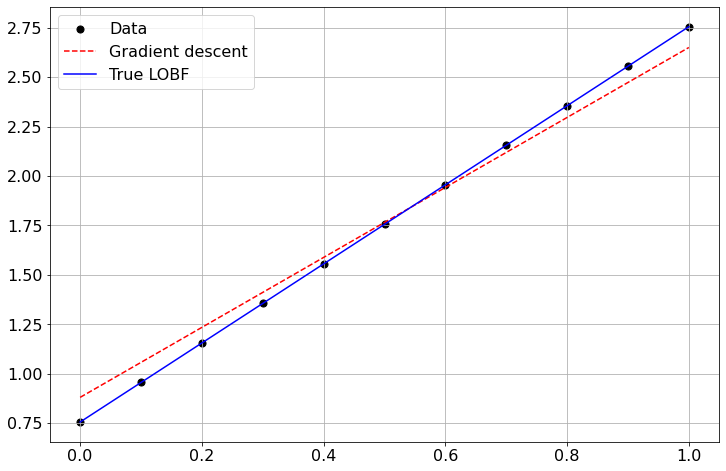

In [13]:
# true line, fitted line, data points
fig = plt.figure(figsize=(12,8))

plt.scatter(ts, xs, color='k', s=50, label='Data')
plt.plot(ts, LOBF[0] + LOBF[1]*ts, '--r', label='Gradient descent')
plt.plot(ts, k0 + k1*ts, '-b', label='True LOBF')
plt.legend(loc=0)
plt.grid()

**Exercise 6.4**

In [14]:
# log likelihood
def logL(k0, k1):
    lsum = 0
    for i in range(N):
        lsum += -0.5*(k0 + k1*ts - xs)**2
    return lsum

def gradlogL(k0, k1):
    lsum = np.zeros(2)
    for i in range(N):
        lsum += np.array([-(k0 + k1*ts[i] - xs[i]), -ts[i]*(k0 + k1*ts[i] - xs[i])])
    return lsum

In [15]:
result2 = gradient_descent_simple(logL, gradlogL, np.array([0.1, 0.2]), 0.1, 100, track_guesses=True, find_max=True)
LOBF2 = result2[-1,:]
LOBF2

array([0.7555656 , 1.99986898])

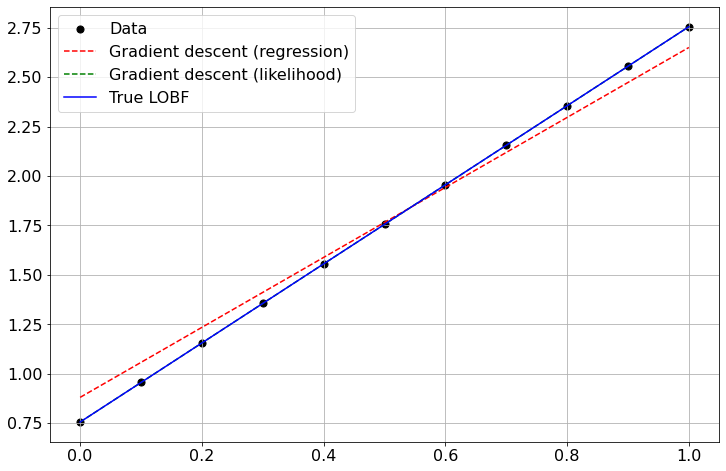

In [16]:
# true line, fitted line, data points
fig = plt.figure(figsize=(12,8))

plt.scatter(ts, xs, color='k', s=50, label='Data')
plt.plot(ts, LOBF[0] + LOBF[1]*ts, '--r', label='Gradient descent (regression)')
plt.plot(ts, LOBF2[0] + LOBF2[1]*ts, '--g', label='Gradient descent (likelihood)')
plt.plot(ts, k0 + k1*ts, '-b', label='True LOBF')
plt.legend(loc=0)
plt.grid()

**Exercise 6.5**

In [17]:
# generating data
N = 101
tn = np.linspace(-1,3,N)
xn = np.zeros(N)

for i in range(N):
    r = np.random.rand()
    if r < (1/(1+np.exp(6 - 6*tn[i]))):
        xn[i] = 1

xn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
def p(w1, w2):
    return (1 + np.exp(-(w1*tn + w2)))**-1

def gradp(w1, w2):
    return np.array([tn*np.exp(-(w1*tn + w2))*(1 + np.exp(-(w1*tn + w2)))**-2,
                     np.exp(-(w1*tn + w2))*(1 + np.exp(-(w1*tn + w2)))**-2])

def cost(w1, w2):
    return (1/(2*N))*np.sum((p(w1, w2) - xn)**2)

def gradcost(w1, w2):
    return np.array([(1/N)*np.sum(gradp(w1,w2)[0]*(p(w1, w2) - xn)),
                     (1/N)*np.sum(gradp(w1,w2)[1]*(p(w1, w2) - xn))])

In [34]:
def gradient_descent_simple(f, df, init, alpha, updates, track_guesses=False, find_max=False):
    # two-parameter gradient descent algorithm with fixed update rule
    current = init
    guesses = init
    
    for i in range(updates):
        if find_max == True:
            current += alpha*df(current[0], current[1])
            
        else:
            current = current - alpha*df(current[0], current[1])
        
        if track_guesses == True:
            guesses = np.vstack(( guesses, current ))
        
    if track_guesses == True:
        return guesses
    
    else:
        return current

In [49]:
result3 = gradient_descent_simple(cost, gradcost, np.array([1, -2]), 0.01, 1000, track_guesses=True)
result3[-1,:]

array([ 1.47789222, -1.81880922])

In [50]:
class_boundary = -result3[:,1]/result3[:,0]
np.shape(class_boundary)

(1001,)

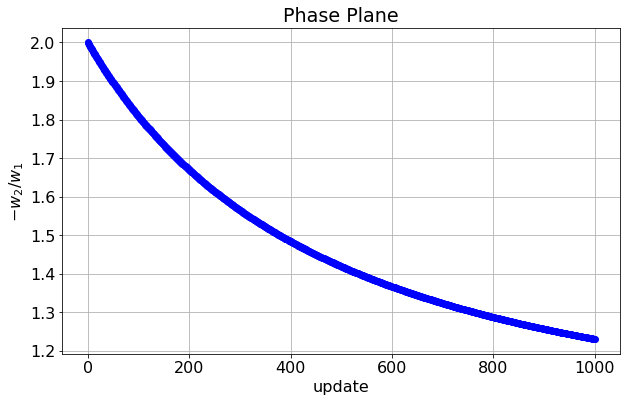

In [52]:
# classification boundary

fig = plt.figure(figsize=(10,6))
plt.plot(range(1001), class_boundary, '--bo')
plt.xlabel('update')
plt.ylabel('$-w_2/w_1$')
plt.title('Phase Plane')
plt.grid()

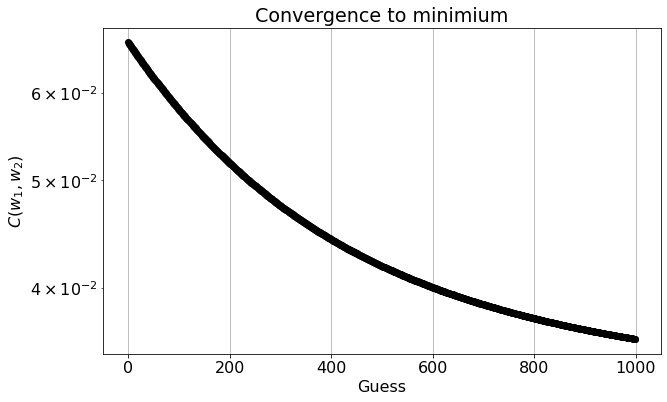

In [53]:
# cost function
fig = plt.figure(figsize=(10,6))

for i in range(1000):
    plt.plot(i, cost(result3[i,0], result3[i,1]), '-ko')
plt.xlabel('Guess')
plt.ylabel('$C(w_1, w_2)$')
plt.title('Convergence to minimium')
plt.yscale('log')
plt.grid()

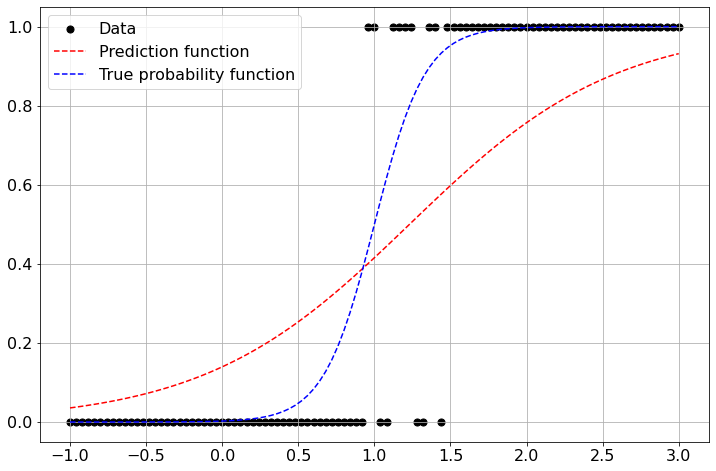

In [54]:
# data and final prediction function
fig = plt.figure(figsize=(12,8))

plt.scatter(tn, xn, color='k', s=50, label='Data')
plt.plot(tn, p(result3[-1,0], result3[-1,1]), '--r', label='Prediction function')
plt.plot(tn, p(6, -6), '--b', label='True probability function')
plt.legend(loc=0)
plt.grid()

**Exercise 6.6**

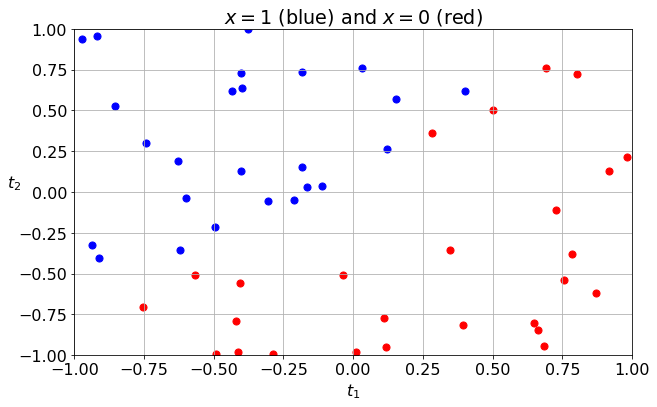

In [63]:
# generating data
N = 51
t1 = np.random.uniform(-1, 1, size=N)
t2 = np.random.uniform(-1, 1, size=N)

# plotting
fig = plt.figure(figsize=(10,6))

x = np.zeros(N)
for i in range(N):
    if t2[i] > t1[i] + 0.1:
        x[i] = 1
        plt.scatter(t1[i], t2[i], color='b', s=50, label='$x = 1$')
    else:
        plt.scatter(t1[i], t2[i], color='r', s=50, label='$x = 0$')
        
plt.xlabel('$t_1$')
plt.ylabel('$t_2$', rotation=0)
plt.title('$x = 1$ (blue) and $x = 0$ (red)')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()

In [67]:
def p(w1, w2, w3):
    return (1 + np.exp(-(w1*t1 + w2*t2 + w3)))**-1

def gradp(w1, w2, w3):
    return np.array([t1*np.exp(-(w1*t1 + w2*t2 + w3))*(1 + np.exp(-(w1*t1 + w2*t2 + w3)))**-2,
                     t2*np.exp(-(w1*t1 + w2*t2 + w3))*(1 + np.exp(-(w1*t1 + w2*t2 + w3)))**-2,
                     np.exp(-(w1*t1 + w2*t2 + w3))*(1 + np.exp(-(w1*t1 + w2*t2 + w3)))**-2])

def cost(w1, w2, w3):
    return (1/(2*N))*np.sum((p(w1, w2, w3) - x)**2)

def gradcost(w1, w2, w3):
    return np.array([(1/N)*np.sum(gradp(w1, w2, w3)[0]*(p(w1, w2, w3) - x)),
                     (1/N)*np.sum(gradp(w1, w2, w3)[1]*(p(w1, w2, w3) - x)),
                     (1/N)*np.sum(gradp(w1, w2, w3)[2]*(p(w1, w2, w3) - x))])

In [68]:
def gradient_descent_simple(f, df, init, alpha, updates, track_guesses=False, find_max=False):
    # two-parameter gradient descent algorithm with fixed update rule
    current = init
    guesses = init
    
    for i in range(updates):
        if find_max == True:
            current += alpha*df(current[0], current[1], current[2])
            
        else:
            current = current - alpha*df(current[0], current[1], current[2])
        
        if track_guesses == True:
            guesses = np.vstack(( guesses, current ))
        
    if track_guesses == True:
        return guesses
    
    else:
        return current

In [70]:
result4 = gradient_descent_simple(cost, gradcost, np.array([0, 1, 0]), 2, 1000, track_guesses=True)
Ws = result4[-1,:]

In [74]:
def pred(t1s, t2s):
    return (1 + np.exp(-(Ws[0]*t1s + Ws[1]*t2s + Ws[2])))**-1

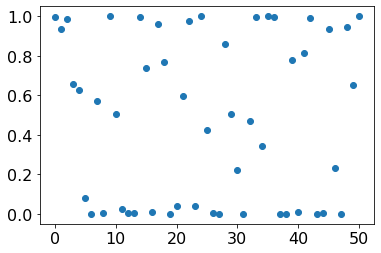

In [73]:
plt.scatter(range(51), p(Ws[0], Ws[1], Ws[2]))

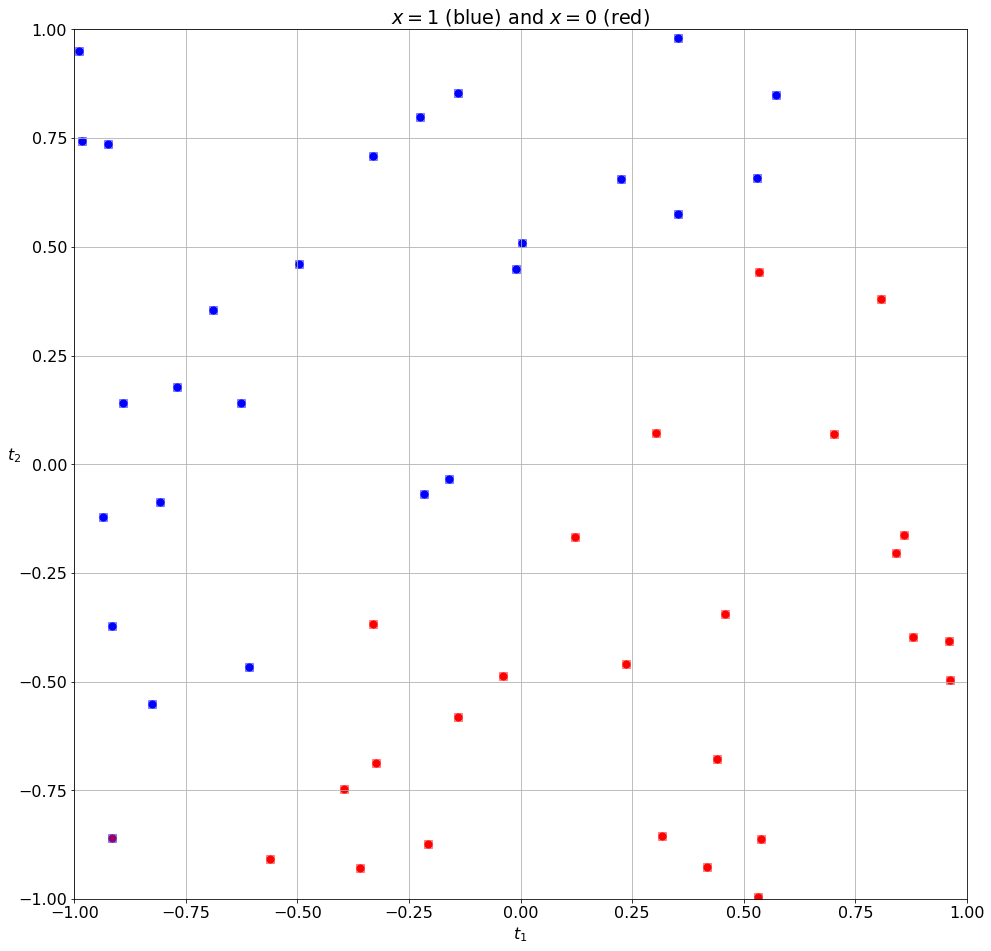

In [76]:
# generating data
N = 51
t1 = np.random.uniform(-1, 1, size=N)
t2 = np.random.uniform(-1, 1, size=N)

# plotting
fig = plt.figure(figsize=(16,16))

x = np.zeros(N)
for i in range(N):
    if t2[i] > t1[i] + 0.1:
        x[i] = 1
        plt.scatter(t1[i], t2[i], color='b', s=50, label='$x = 1$')
    else:
        plt.scatter(t1[i], t2[i], color='r', s=50, label='$x = 0$')
    
    if pred(t1[i], t2[i]) > 0.5:
        plt.scatter(t1[i], t2[i], color='b', alpha=0.4, marker='s', s=50)
    
    else:
        plt.scatter(t1[i], t2[i], color='r', alpha=0.4, marker='s', s=50)

plt.xlabel('$t_1$')
plt.ylabel('$t_2$', rotation=0)
plt.title('$x = 1$ (blue) and $x = 0$ (red)')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()